In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
dataset_file = "/home/ubuntu/SPPR/data-4275-2021-02-09.xlsx"
data = pd.read_excel(dataset_file)
data.head()


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",(499) 183-14-10,48,нет,37.714565,55.879002,"{type=Point, coordinates=[37.71456500043604, 5..."
1,77874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",(495) 676-55-35,35,нет,37.673306,55.738239,"{type=Point, coordinates=[37.6733061300344, 55..."
2,24309,Кафе «Академия»,637376349,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",(495) 662-30-10,95,нет,37.669648,55.735511,"{type=Point, coordinates=[37.6696475969381, 55..."
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",(499) 908-06-15,240,нет,37.566940,55.904019,"{type=Point, coordinates=[37.56694, 55.9040188..."
4,148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",(495) 697-04-89,10,нет,37.598128,55.747390,"{type=Point, coordinates=[37.59812754843999, 5..."


### 1. Сравнение количества мест (аналог "IQ boxplot")

Задача: сравнить распределение количества мест (SeatsCount) по округам (AdmArea).

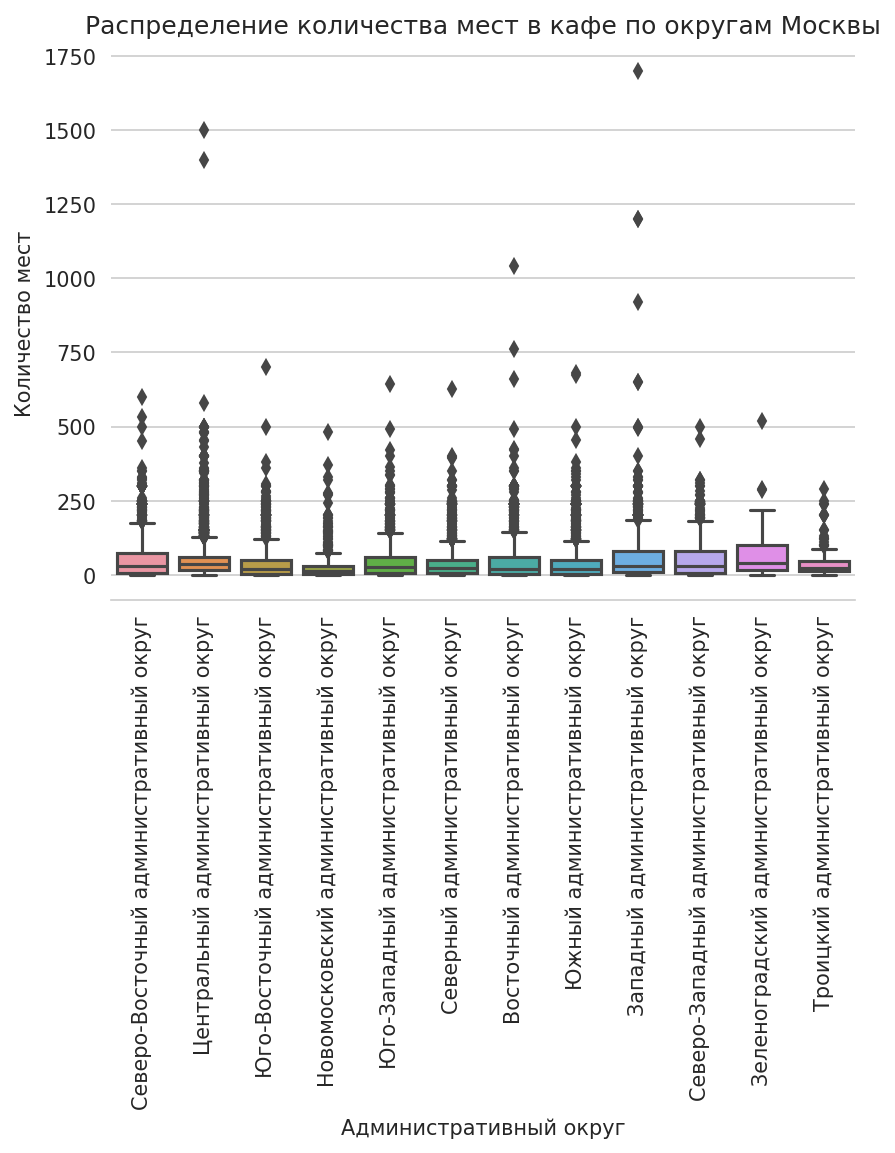

In [3]:
plt.figure(dpi=150)
sns.set_style("whitegrid")

# Строим boxplot
sns.boxplot(x="AdmArea", y="SeatsCount", data=data)

# Убираем лишние оси
sns.despine(left=True, right=True, top=True)

# Настраиваем подписи
plt.title("Распределение количества мест в кафе по округам Москвы")
plt.xlabel("Административный округ")
plt.ylabel("Количество мест")

# Поворачиваем подписи на оси X для читаемости
plt.xticks(rotation=90)

plt.show()


### 2. Цветовые палитры (аналог "Color Palettes")

Построим демонстрацию палитр, а затем применим одну к barplot-графику

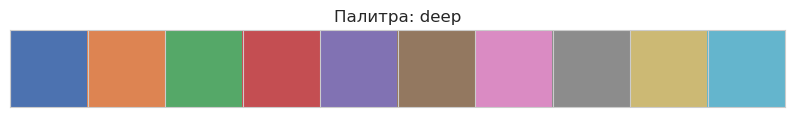

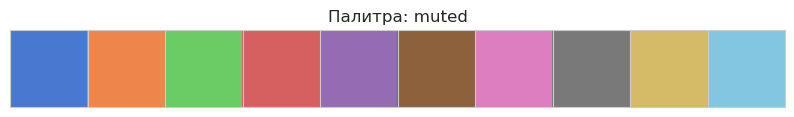

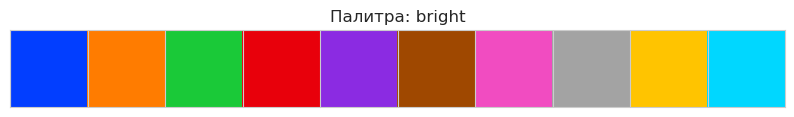

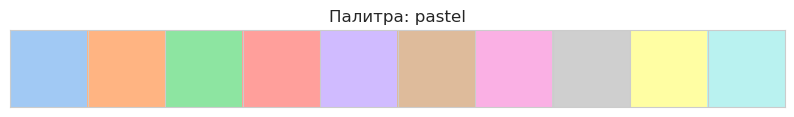

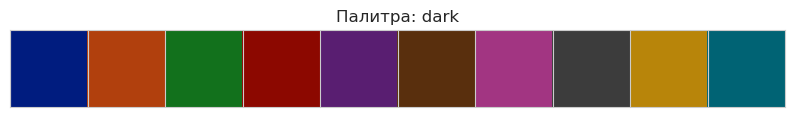

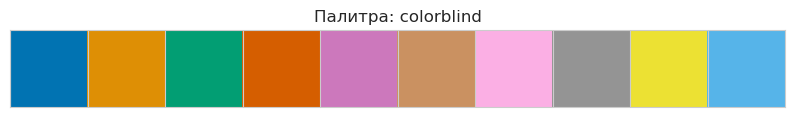

In [4]:
# Просмотр доступных палитр
palettes = ["deep", "muted", "bright", "pastel", "dark", "colorblind"]
for p in palettes:
    sns.palplot(sns.color_palette(p))
    plt.title(f"Палитра: {p}")
    plt.show()


Теперь применим палитру для barplot-а:

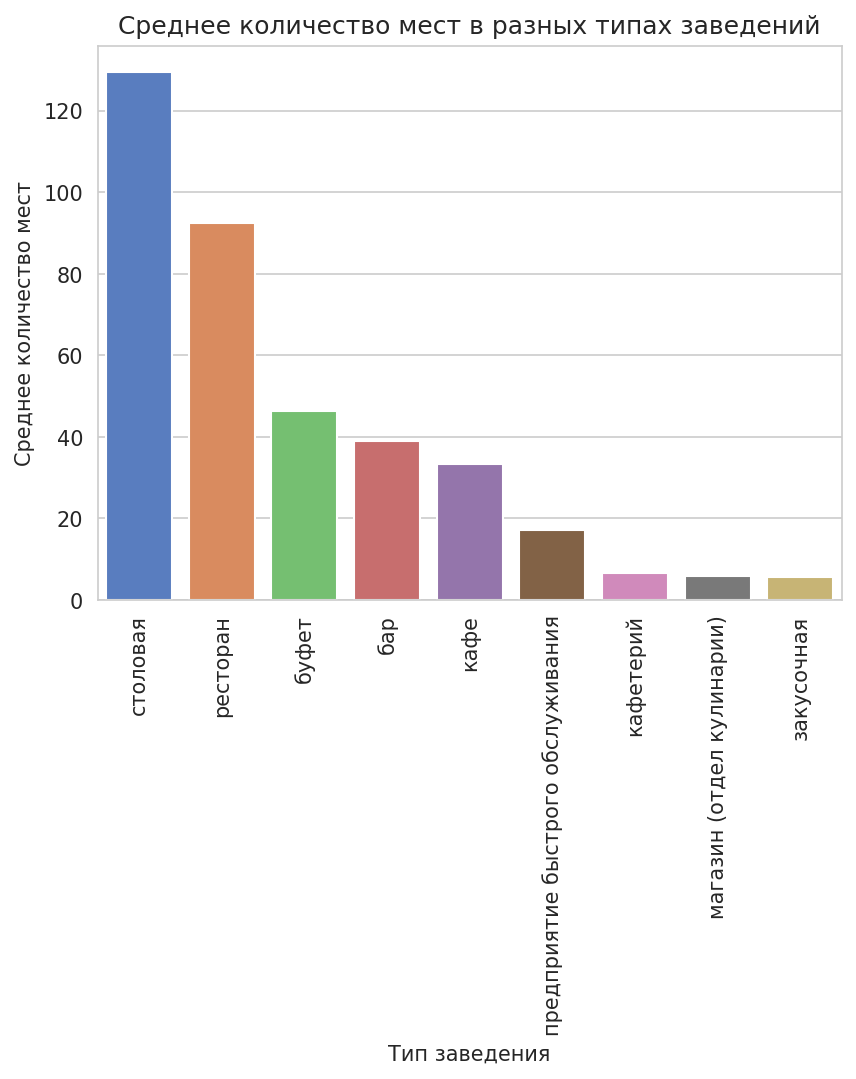

In [5]:
plt.figure(dpi=150)
sns.set_style("whitegrid")
sns.set_palette("muted")

avg_seats = data.groupby("TypeObject")["SeatsCount"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_seats.index, y=avg_seats.values)
plt.title("Среднее количество мест в разных типах заведений")
plt.xlabel("Тип заведения")
plt.ylabel("Среднее количество мест")
plt.xticks(rotation=90)
plt.show()


### 3. Тепловая карта (аналог "Heatmap")

Задача: найти закономерности между округами и районами по количеству заведений.

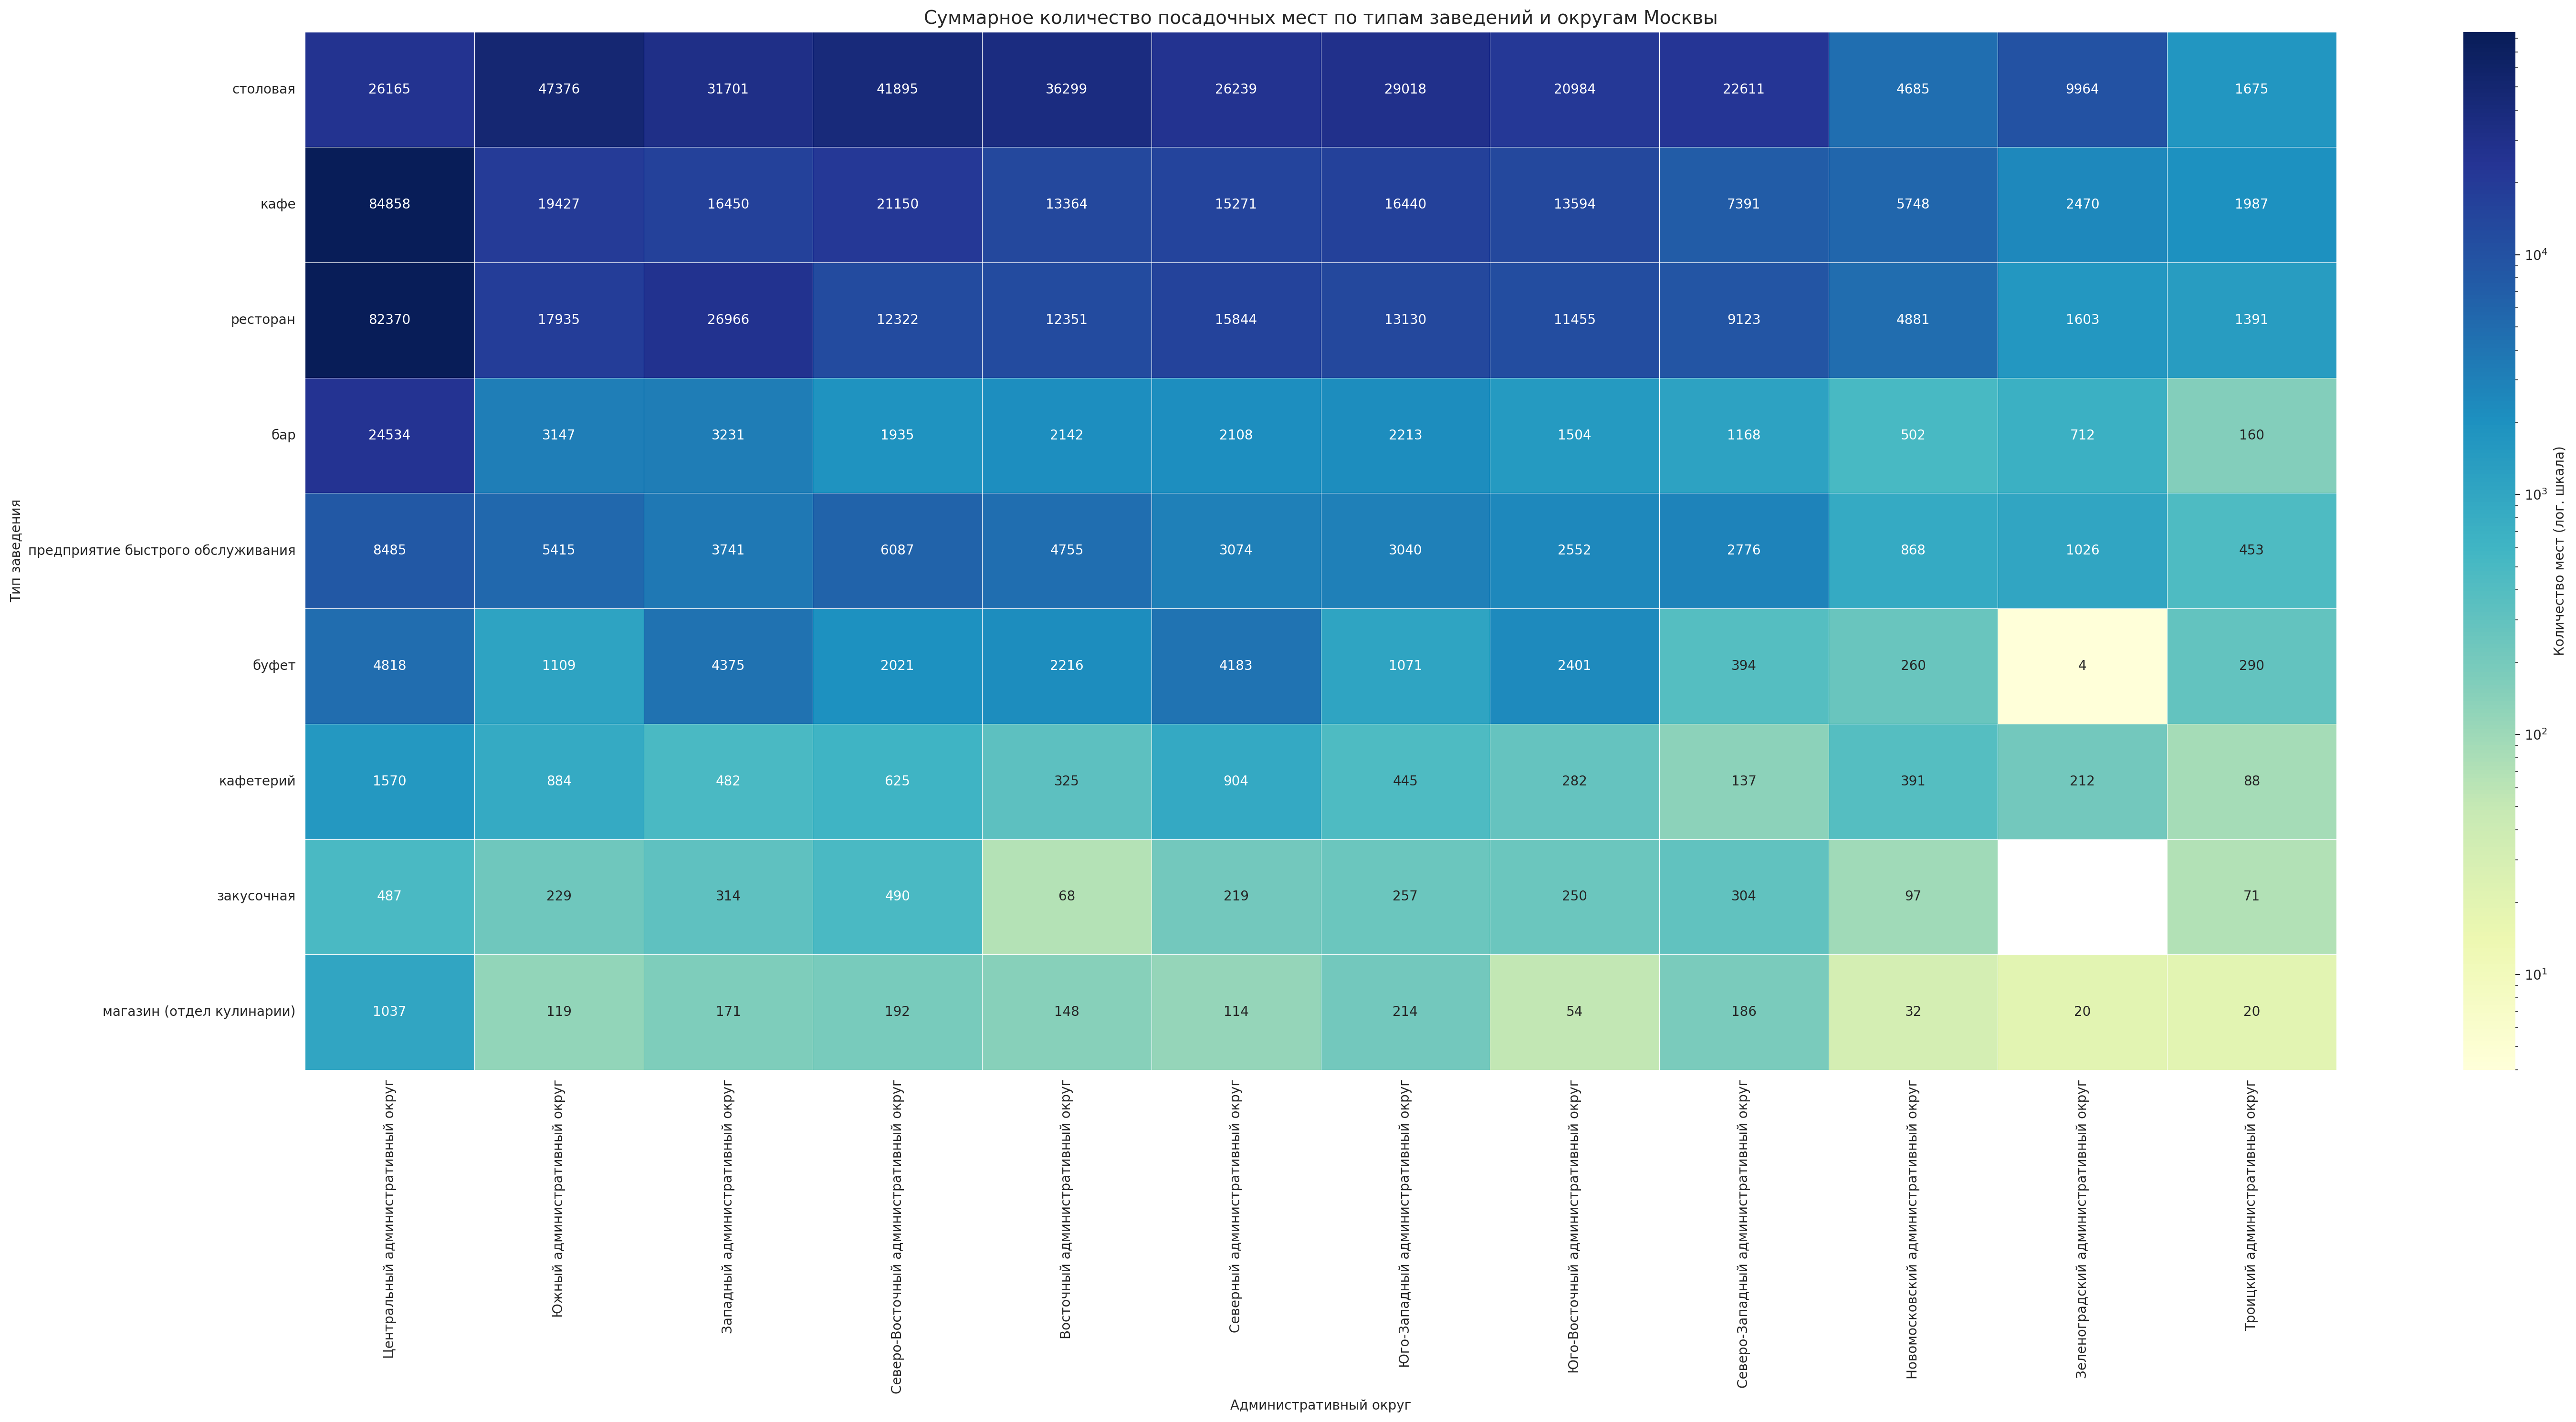

In [6]:
from matplotlib.colors import LogNorm

# Создаем сводную таблицу: сумма посадочных мест по типам заведений и округам
pivot = data.pivot_table(index="TypeObject", columns="AdmArea", values="SeatsCount", aggfunc="sum", fill_value=0)

# Сортируем типы заведений по убыванию общего количества мест
type_sums = pivot.sum(axis=1).sort_values(ascending=False)
pivot = pivot.loc[type_sums.index]

# Сортируем округа по убыванию общего количества мест
area_sums = pivot.sum(axis=0).sort_values(ascending=False)
pivot = pivot[area_sums.index]

plt.figure(figsize=(30, 15), dpi=200)

sns.heatmap(pivot, 
            cmap="YlGnBu", 
            linewidths=0.3, 
            annot=True,
            fmt=".0f",
            norm=LogNorm(),
            cbar_kws={'label': 'Количество мест (лог. шкала)'})

plt.title("Суммарное количество посадочных мест по типам заведений и округам Москвы", fontsize=14)
plt.xlabel("Административный округ")
plt.ylabel("Тип заведения")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 4. Регрессионный график (аналог "Regression plot")

Задача: проверить, есть ли зависимость между количеством мест и долготой (например, заведения в центре против окраин).

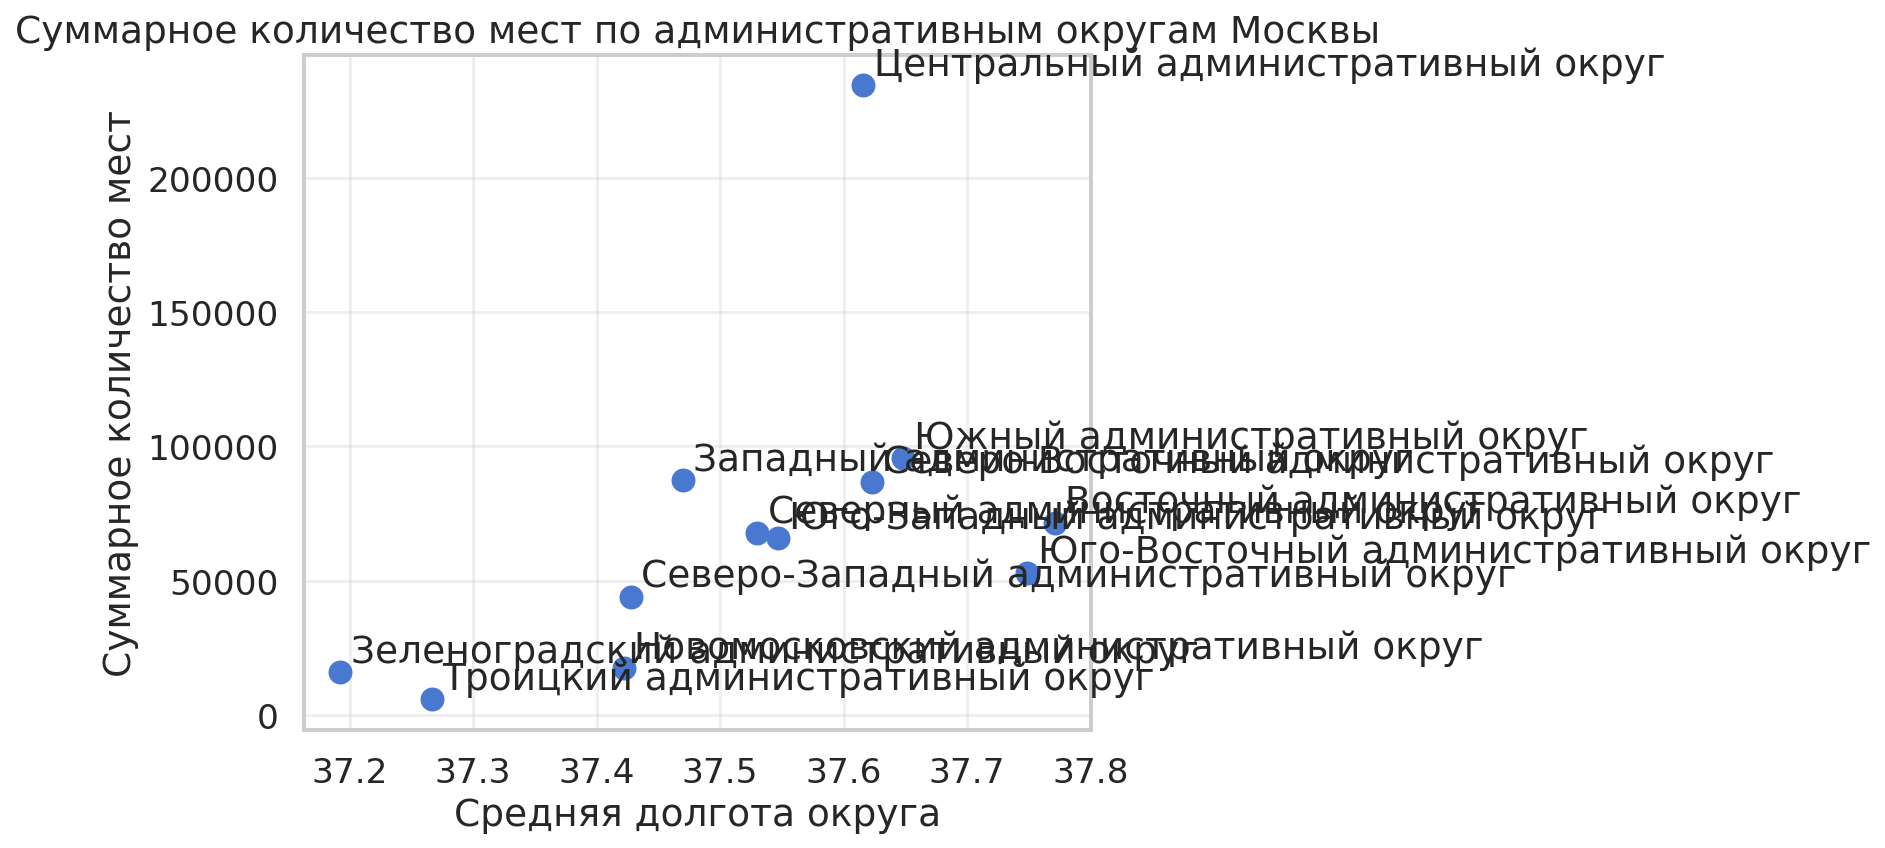

In [15]:
# Вариант с административными округами
plt.figure(figsize=(12, 6), dpi=150)
sns.set_context("talk")

# Агрегируем по округам: средняя долгота и сумма мест
area_agg = data.groupby('AdmArea').agg({
    'Longitude_WGS84': 'mean',
    'SeatsCount': 'sum'
}).reset_index()

# Сортируем округа по средней долготе
area_agg = area_agg.sort_values('Longitude_WGS84')

# Строим scatter plot с долготой по X
plt.scatter(area_agg['Longitude_WGS84'], area_agg['SeatsCount'], s=100)

plt.title("Суммарное количество мест по административным округам Москвы")
plt.xlabel("Средняя долгота округа")
plt.ylabel("Суммарное количество мест")

# Добавляем подписи для каждого округа
for i, row in area_agg.iterrows():
    plt.annotate(row['AdmArea'], 
                (row['Longitude_WGS84'], row['SeatsCount']),
                xytext=(5, 5), textcoords='offset points')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

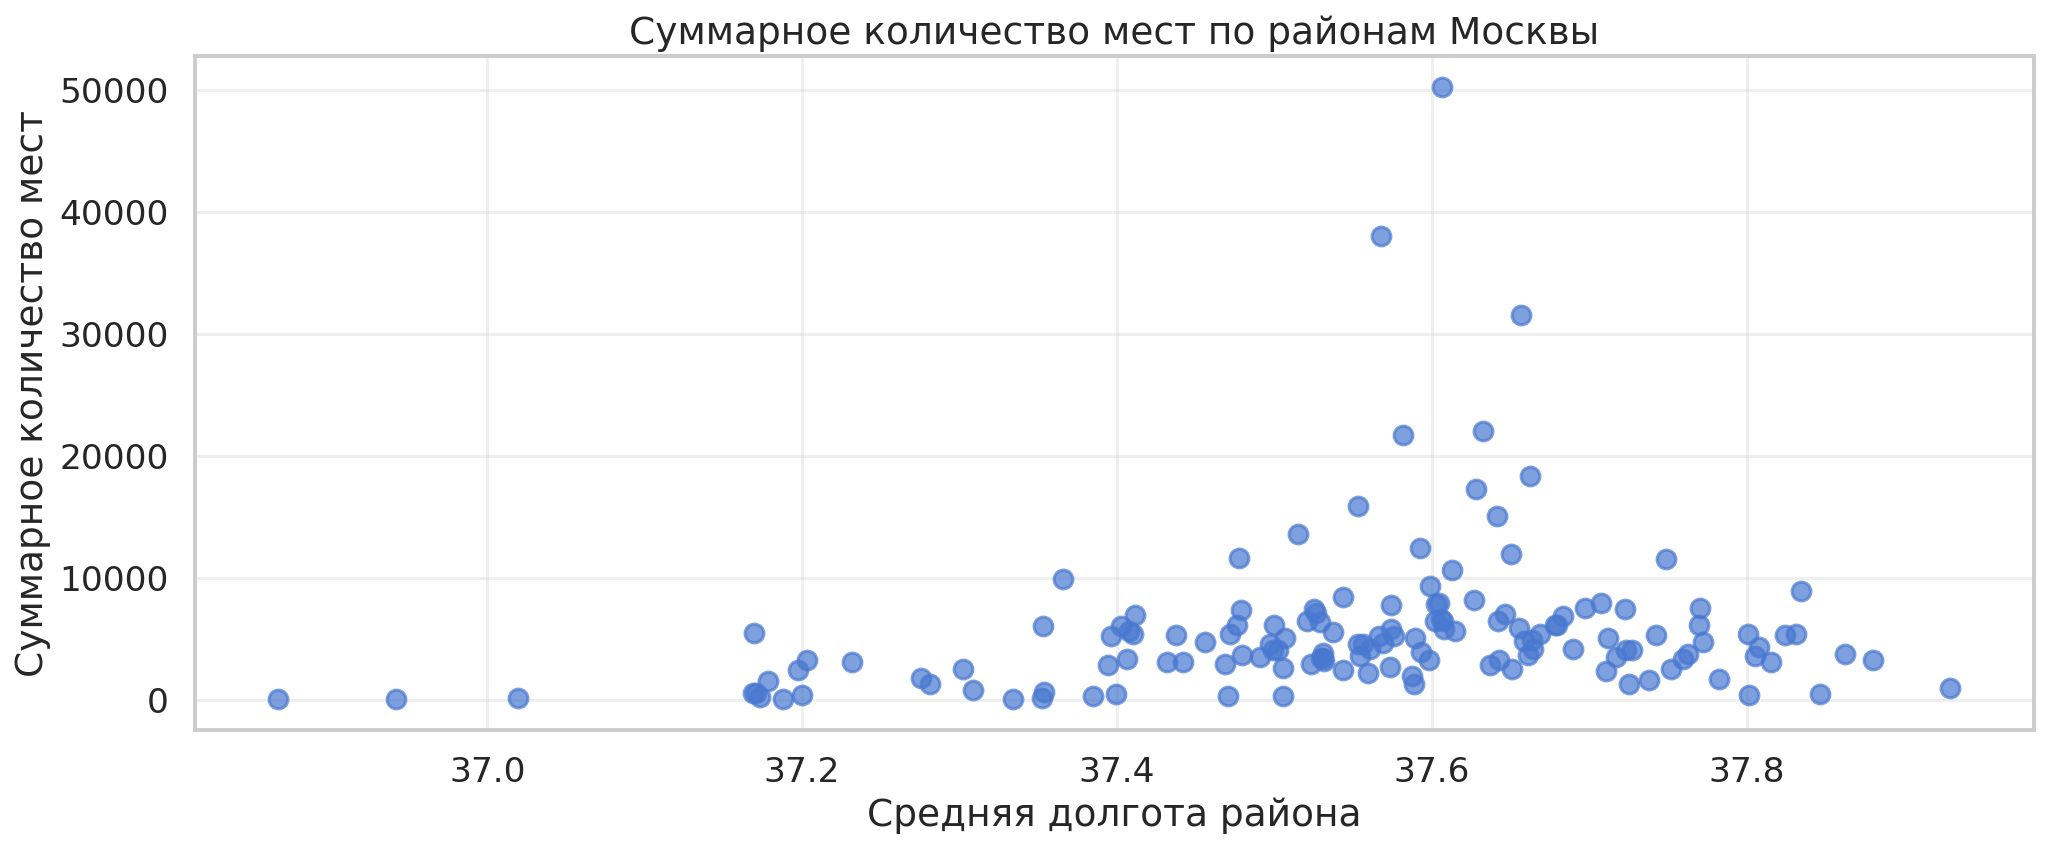

In [16]:
# Вариант с районами
plt.figure(figsize=(14, 6), dpi=150)
sns.set_context("talk")

# Агрегируем по районам: средняя долгота и сумма мест
district_agg = data.groupby('District').agg({
    'Longitude_WGS84': 'mean',
    'SeatsCount': 'sum'
}).reset_index()

# Сортируем районы по средней долготе
district_agg = district_agg.sort_values('Longitude_WGS84')

# Строим scatter plot с долготой по X
plt.scatter(district_agg['Longitude_WGS84'], district_agg['SeatsCount'], alpha=0.7)

plt.title("Суммарное количество мест по районам Москвы")
plt.xlabel("Средняя долгота района")
plt.ylabel("Суммарное количество мест")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Вывод:
Можно заметить, что заведения ближе к центру (меньшая долгота) чаще имеют большее количество мест.

### 5. Древовидная карта (Squarify)

Задача: визуализировать долю заведений каждого типа.

In [9]:
import sys
!{sys.executable} -m pip install squarify

  Using cached squarify-0.4.4-py3-none-any.whl (4.1 kB)


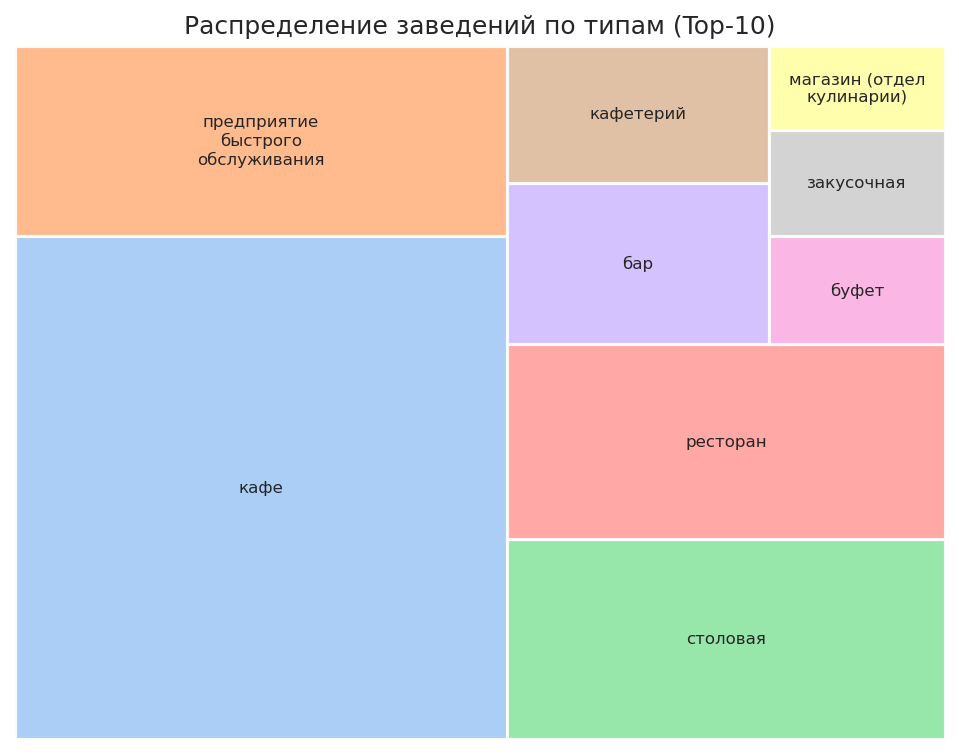

In [16]:
import squarify
import textwrap

type_counts = data["TypeObject"].value_counts().head(10)
colors = sns.color_palette("pastel", len(type_counts))

# Перенос длинных названий
wrapped_labels = [
    "\n".join(textwrap.wrap(label, width=15))
    for label in type_counts.index
]

plt.figure(figsize=(8,6), dpi=150)

# Рисуем карту с уменьшенным шрифтом
squarify.plot(
    sizes=type_counts.values,
    label=wrapped_labels,
    color=colors,
    alpha=0.9,
    text_kwargs={'fontsize': 8}
)

plt.axis("off")
plt.title("Распределение заведений по типам (Top-10)", fontsize=12)
plt.show()


### Заключение

В ходе лабораторной работы были изучены возможности библиотеки Seaborn на примере данных о кафе Москвы.
Построены:

boxplot для сравнения вместимости по округам,

barplot с кастомными палитрами,

heatmap для анализа плотности заведений,

регрессионная диаграмма,

и древовидная карта.

Библиотека Seaborn показала себя как мощный инструмент для быстрой и наглядной визуализации данных с минимальным количеством кода.

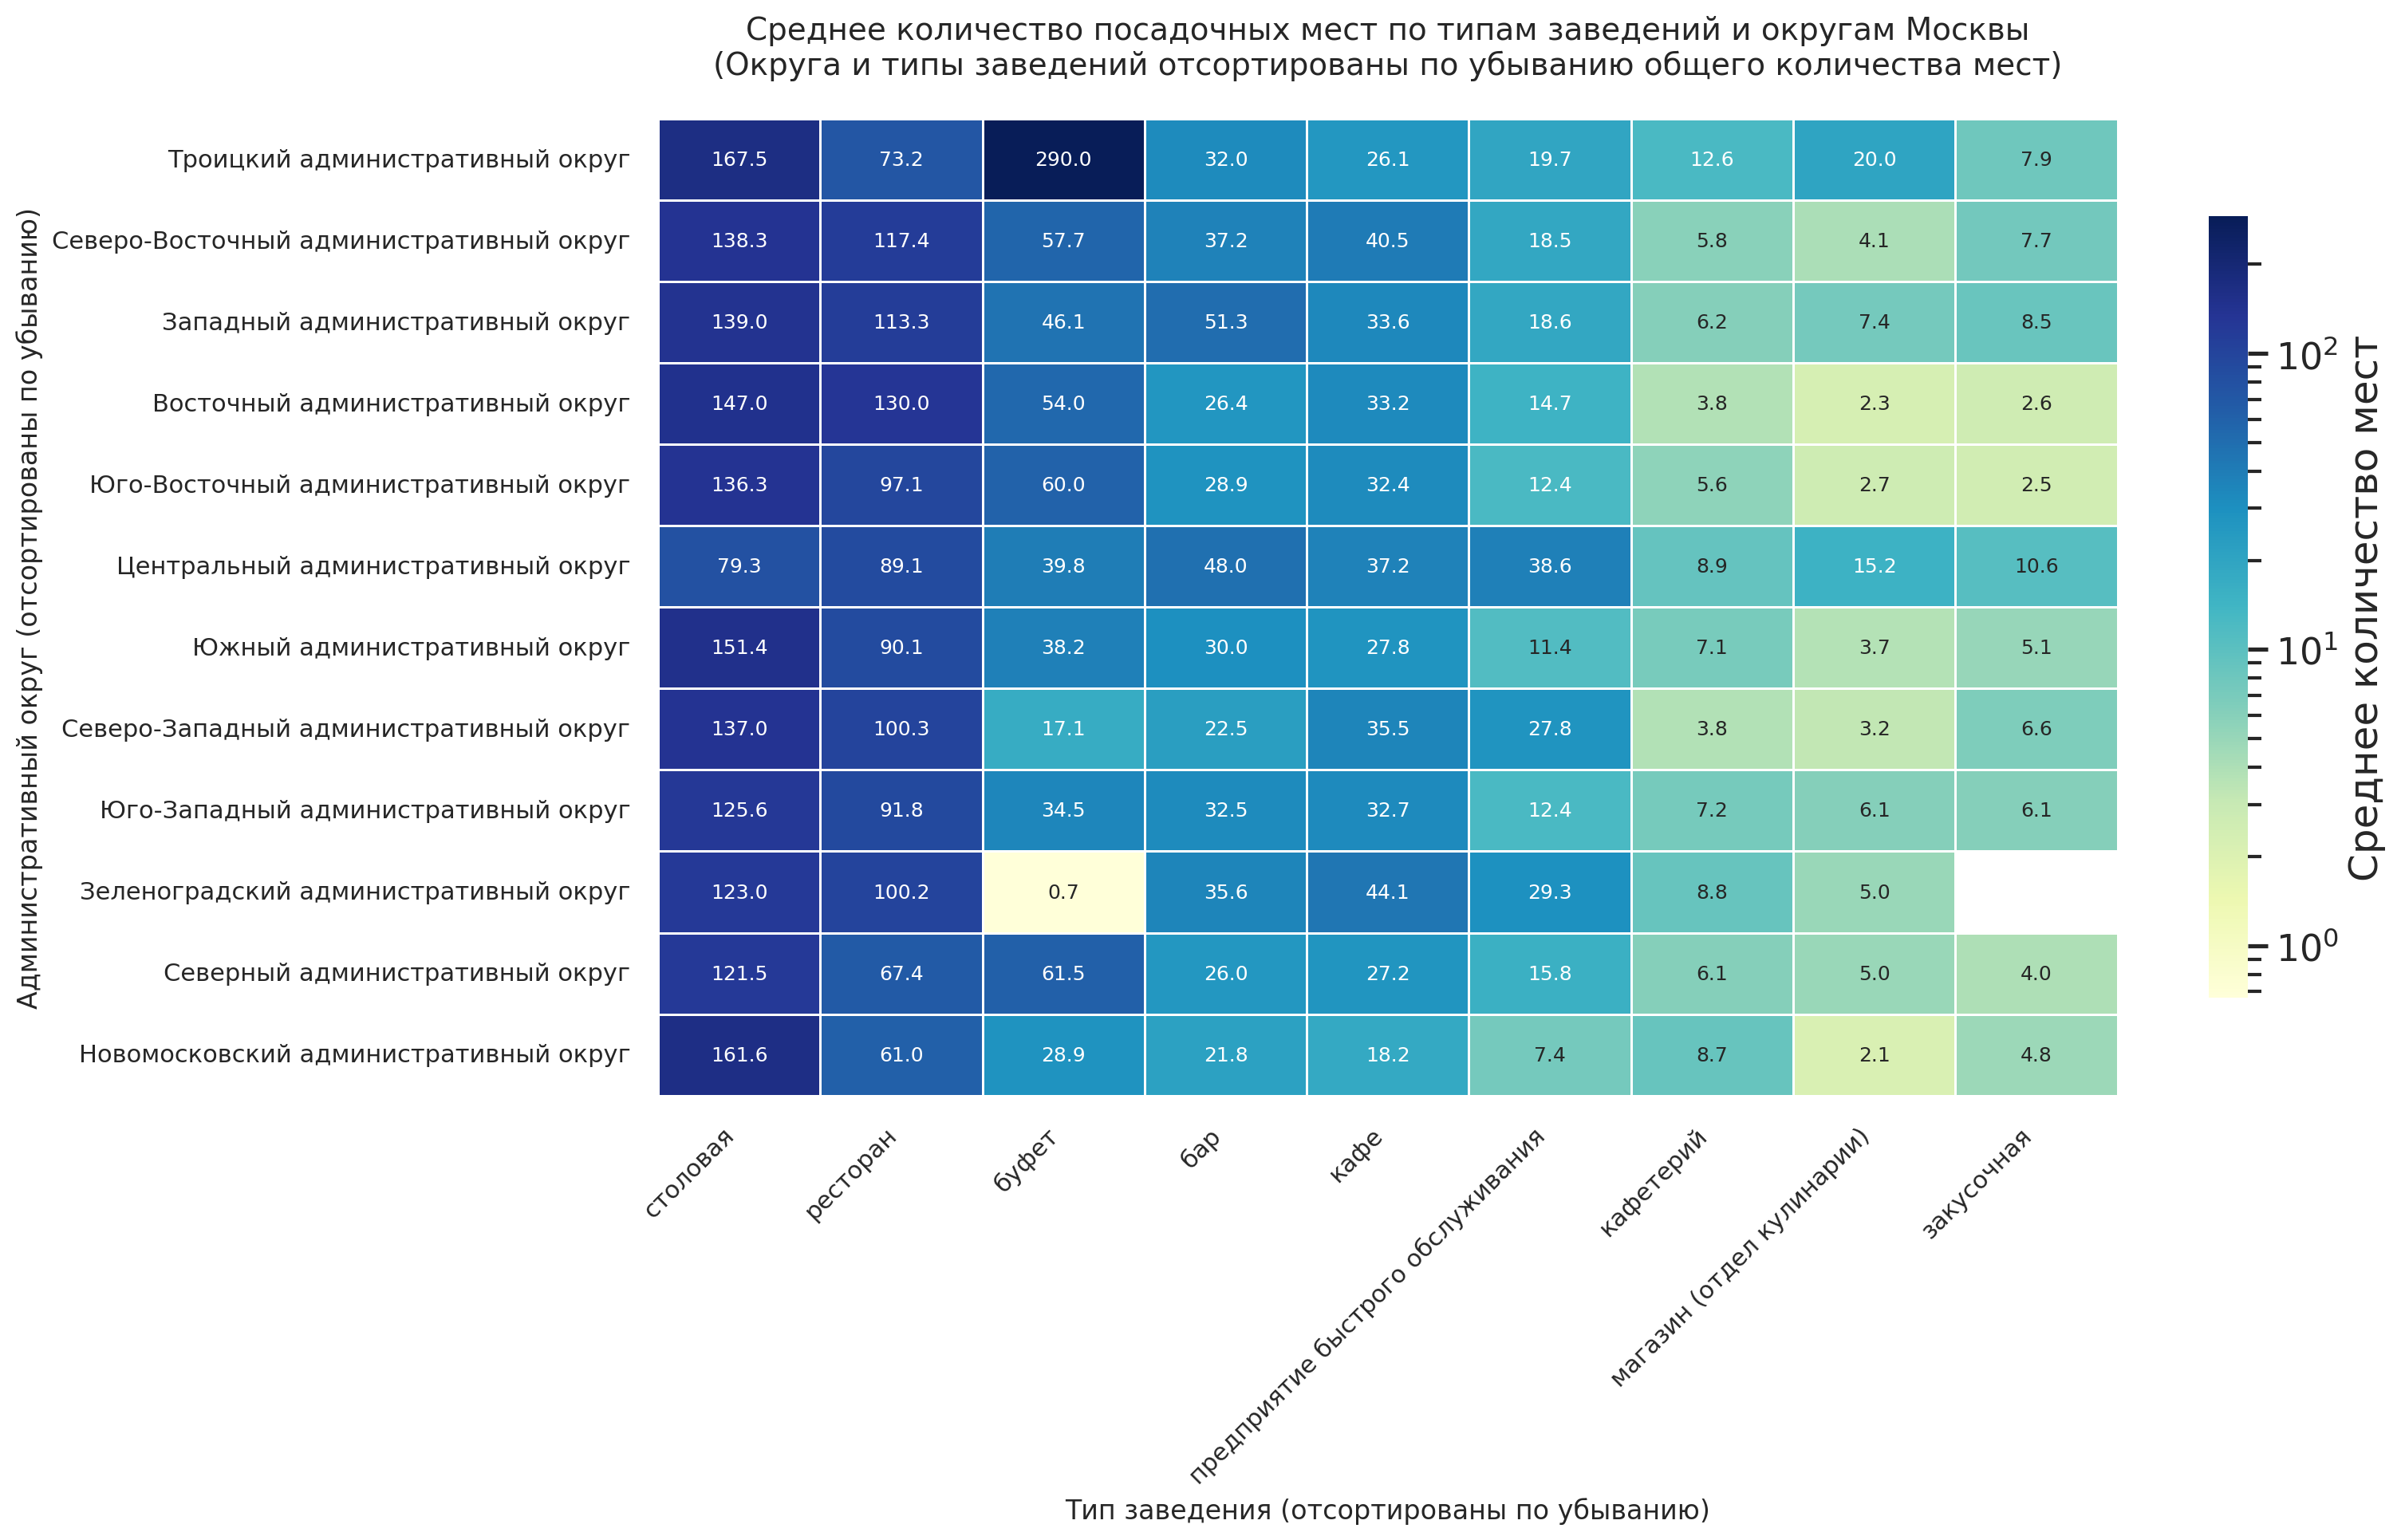

In [48]:
from matplotlib.colors import LogNorm

df=data

pivot_table = df.pivot_table(
    index="AdmArea", 
    columns="TypeObject", 
    values="SeatsCount", 
    aggfunc="mean", 
    fill_value=0
)

districts_sorted = pivot_table.sum(axis=1).sort_values(ascending=False)
pivot_sorted_by_district = pivot_table.loc[districts_sorted.index]

venue_types_sorted = pivot_table.sum(axis=0).sort_values(ascending=False)
final_pivot = pivot_sorted_by_district[venue_types_sorted.index]

plt.figure(figsize=(16, 10), dpi=200)

heatmap = sns.heatmap(
    final_pivot, 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor='white',
    annot=True,  
    fmt=".1f",
    norm=LogNorm(),
    annot_kws={'size': 9},
    cbar_kws={'label': 'Среднее количество мест', 'shrink': 0.8}
)

plt.title("Среднее количество посадочных мест по типам заведений и округам Москвы\n"
          "(Округа и типы заведений отсортированы по убыванию общего количества мест)", 
          fontsize=14, pad=20)
plt.xlabel("Тип заведения (отсортированы по убыванию)", fontsize=12)
plt.ylabel("Административный округ (отсортированы по убыванию)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()